<a href="https://colab.research.google.com/github/simonvidal/minitarea4/blob/master/minitarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##Minitarea 4: Análisis de Cubo de datos extragaláctico y querys.

###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.



###Instrucciones:

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
3. Abrir [Google Colab](https://colab.research.google.com/) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
6. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.




#1. FITS en Google Drive.

En el siguiente enlace [(link)](https://docs.google.com/spreadsheets/d/1lT4h9Evwm6i2SBeuCK5dESTm8FijVZX7r6ixq-dt3ZM/edit#gid=0) se encuentra un excel con 30 galaxias observadas con CALIFA usando la técnica de Integral Field Spectroscopy (IFS). Debe escoger una galaxia que se encuentre disponible anotando su nombre en la casilla correspondiente a la galaxia que desee escoger (**No puede elegir una ya escojida por alguien más**). A cada galaxia le corresponde un link con el cual se pueden descargar los datos obtenidos por CALIFA para dicha galaxia en un cubo de datos **fits.gz**.

Descargue el archivo correspondiente y súbalo a la cuenta de Google Drive vinculada con la cuenta de Google que utiliza para trabajar con [Google Colab](https://colab.research.google.com/). Asegúrese que el archivo de descarga corresponde con la galaxia seleccionada, en caso contrario hágalo saber al equipo docente.

Ahora importe los paquetes y funciones necesarias vistas en clases para poder montar su unidad de Google drive. Si lo hace correctamente debiese aparecer un mensaje. Verifique que se muestra al correr esas líneas de código.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from google.colab import drive
from astropy.io import fits
from astropy.wcs import WCS
drive.mount("/content/gdrive")
!pip install astroquery 
from astroquery.sdss import SDSS

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Visualización de la Galaxia 

En esta parte debe hacer lectura del cubo de datos **fits.gz** que se encuentra guardado en su Google Drive. Importe todos los paquetes que sean necesarios, no olvide leer el header (Ya sea en su forma normal o en WCS) e imprímalo en pantalla.

In [3]:
archivo = ('/content/gdrive/My Drive/Colab Notebooks/NGC0036.V500.rscube.fits.gz')
hdu = fits.open(archivo)[0]
header = hdu.header
wcs = WCS(header)
print wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 2.842814732812767  6.389123175355037  3749.0  
CRPIX : 38.0  32.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 78  72  1877


Ahora haga un subplot que contemple 4 imágenes de la galaxia en 4 diferentes longitudes de onda de todo el espectro observado. Usted debe escoger estas cuatro longitudes de onda como se le antoje. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

**Consejo**: Dentro de las longitudes de onda, se sugiere que escoja una cercana a los 6563 Angstrom.

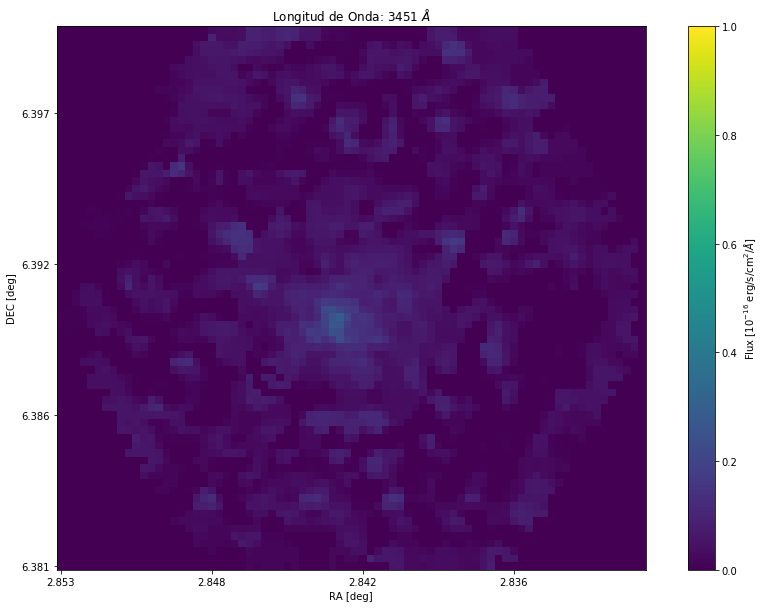

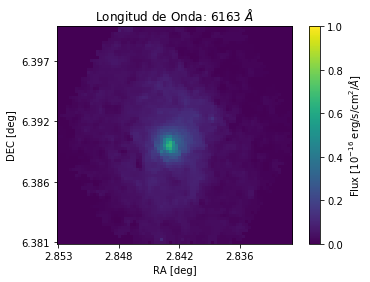

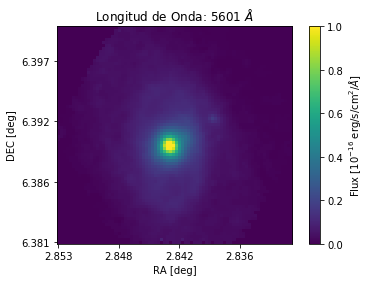

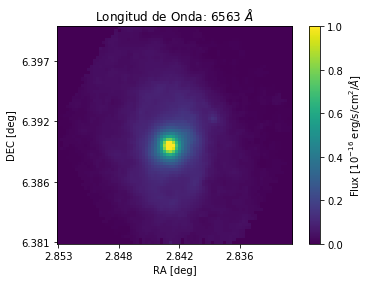

In [4]:
data = hdu.data
plt.figure(figsize=(15,10))
delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']
delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']
delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']

plt.imshow(data[1],cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) 
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) 
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Longitud de Onda: 3451 $\AA$')
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.show()

plt.imshow(data[223],cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) 
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) 
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Longitud de Onda: 6163 $\AA$')
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.show()

plt.imshow(data[1062],cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) 
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) 
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Longitud de Onda: 5601 $\AA$')
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.show()

plt.imshow(data[1407],cmap='viridis',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) 
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) 
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Longitud de Onda: 6563 $\AA$')
cb = plt.colorbar()
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')

#3. Espectros de la Galaxia

Como saben, a cada pixel le corresponde un espectro. Ahora haga un subplot que contemple el espectro de 9 pixeles de la galaxia. 8 de los 9 pixeles deben ser escogidos al azar, mientras que uno de ellos debe corresponder al espectro de los pixeles de referencia que el header indica. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

Finalmente calcule el redshift al cual se encuentra el objeto, para ello puede indentificar las líneas de los espectros obtenidos en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx). El cálculo del redshift debe hacerse con la información de los espectros del fits. Ignore la rotación de la galaxia. 

**Hint:** Le puede ser útil saber que la línea de H$\alpha$ se encuentra centrada en 6563 Angstroms. La longitud de onda de las primeras líneas de la serie de Balmer las puede encontrar en [aquí](https://es.wikipedia.org/wiki/L%C3%ADneas_de_Balmer). Imprima en pantalla la operación a realizar y que línea o líneas usó para determinar el redshift al cual se encuentra la galaxia.

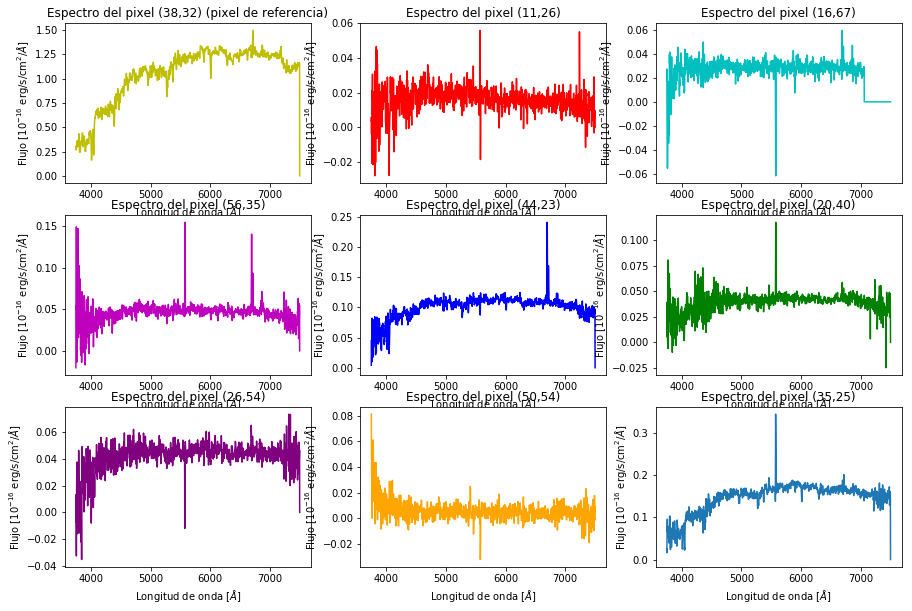

In [5]:
delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']
fig, ax=plt.subplots(figsize=(15,10),nrows=3,ncols=3)
ax[0,0].plot(lo,data[:,32,37],color='y')
ax[0,1].plot(lo,data[:,25,10],color='r')
ax[0,2].plot(lo,data[:,66,15],color='c')
ax[1,0].plot(lo,data[:,34,55],color='m')
ax[1,1].plot(lo,data[:,22,43],color='b')
ax[1,2].plot(lo,data[:,39,19],color='g')
ax[2,0].plot(lo,data[:,53,25],color='purple')
ax[2,1].plot(lo,data[:,71,49],color='orange')
ax[2,2].plot(lo,data[:,24,34])
rx=header['CRPIX1']
ry=header['CRPIX2']
t=np.array([['('+str(rx)+','+str(ry)+') '+'(pixel de referencia)','(11,26)','(16,67)'],['(56,35)','(44,23)','(20,40)'],['(26,54)','(50,54)','(35,25)']])
for i in range(3):
  for j in range(3):
    ax[i,j].set_xlabel('Longitud de onda [$\AA$]')
    ax[i,j].set_ylabel('Flujo [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
    ax[i,j].set_title('Espectro del pixel '+t[i,j])

#4. Coordenadas

En esta parte deben crear una variable que contenga un objeto SkyCoord definido con los dos últimos dígitos de rut como ascención recta y declinación en el sistema ICRS (No contar el dígito verificador).

**Ejemplo:** si su RUT es 12.345.678 - 9. La ascención recta y declinación para ese objeto debe ser 78°. Si los úlitmos dos dígitos son mayores que noventa, utilice solo el último.

In [6]:
#rut: 2005025-5
c=SkyCoord(ra=25*u.degree,dec=25*u.degree,frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    (25., 25.)>

#5. Query: Imagen

En esta parte haga un query a los datos del SDSS utilizando como coordenadas las definidas anteriormente en una región de radio 10 arcsec, además, asegúrese que los objetos de la busqueda cuentan con un espectro. En caso de no encontrar algo, multiplique el radio por 2 hasta encontrar un objeto. Extraiga el espectro y la fotometría en las bandas z e i.

Imprima en pantalla el WCS header de alguno de los fits fotometría, y proceda a graficar las regiones mostradas en los dos fits fotométricos descargados. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Como los datos son del SDSS, ustedes encontraran una imagen de la placa entera, hagan un zoom mostrando de forma cercana el objeto que les debiese haber salido al azar, queda a su criterio cuanto deben ampliar la imagen ustedes.

In [7]:
xid = SDSS.query_region(c, radius = 300*u.arcsec, spectro=True) #en 300 recién me funcionó jaja :(
sp = SDSS.get_spectra(matches=xid)
imu = SDSS.get_images(matches=xid, band='i')
img = SDSS.get_images(matches=xid, band='z') 
 
headeri=imu[0][0].header
WCSI=WCS(headeri)
print(WCSI)
print('\nHEADER:')
headeri

/usr/local/lib/python2.7/dist-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 24.8525975905  24.918532791  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 1.72472321876e-05  0.000108628914717  
CD2_1 CD2_2  : 0.000108656437592  -1.72913736137e-05  
NAXIS : 2048  1489

HEADER:


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4760679483.31 / 1st row Number of seconds since Nov 17 1858    
RA      =            25.115696 / 1st row RA of telescope boresight (deg)        
DEC     =            26.964018 / 1st row Dec of telescope boresight (degrees)   
SPA     =              99.272  / 1st row Cam col position angle wrt N (deg)     
IPA     =              28.56

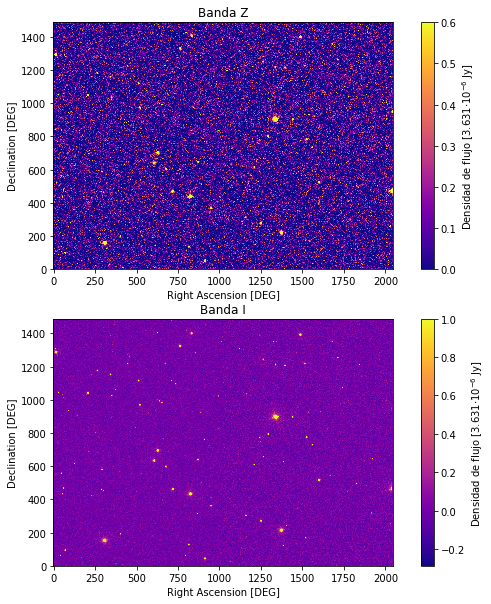

In [12]:
z=img[0][0].data
i=imu[0][0].data
fig,cx=plt.subplots(figsize=(10,10),nrows=2)
gz=cx[0].imshow(z,cmap='plasma',vmax=0.6,origin='lower',vmin=0)
plt.colorbar(gz,ax=cx[0],label='Densidad de flujo [3.631$ \cdot 10^{-6}$ Jy]')
gi=cx[1].imshow(i,cmap='plasma',vmax=1,origin='lower')
plt.colorbar(gi,ax=cx[1],label='Densidad de flujo [3.631$ \cdot 10^{-6}$ Jy]')
b=['Z','I']
for i in range(2):
  cx[i].set_xlabel('Right Ascension [DEG]')
  cx[i].set_ylabel('Declination [DEG]')
  cx[i].set_title('Banda '+b[i])

#6. Query: Espectro

En esta parte haga un gráfico con los datos espectroscópicos del objeto encontrado. Imprima en pantalla el WCS header. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Compare el objeto con el encontrado en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx), identifique las líneas y hagan que se vean en el espectro bien señalizadas.

WCS Keywords

Number of WCS axes: 1
CTYPE : ''  
CRVAL : 0.0  
CRPIX : 0.0  
PC1_1  : 1.0  
CDELT : 1.0  
NAXIS : 0  0


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a string value was expected. [astropy.wcs.wcs]


Text(0,0.5,'Flux density [10$^{-17}$ erg/cm$^2$/s/$\\AA$]')

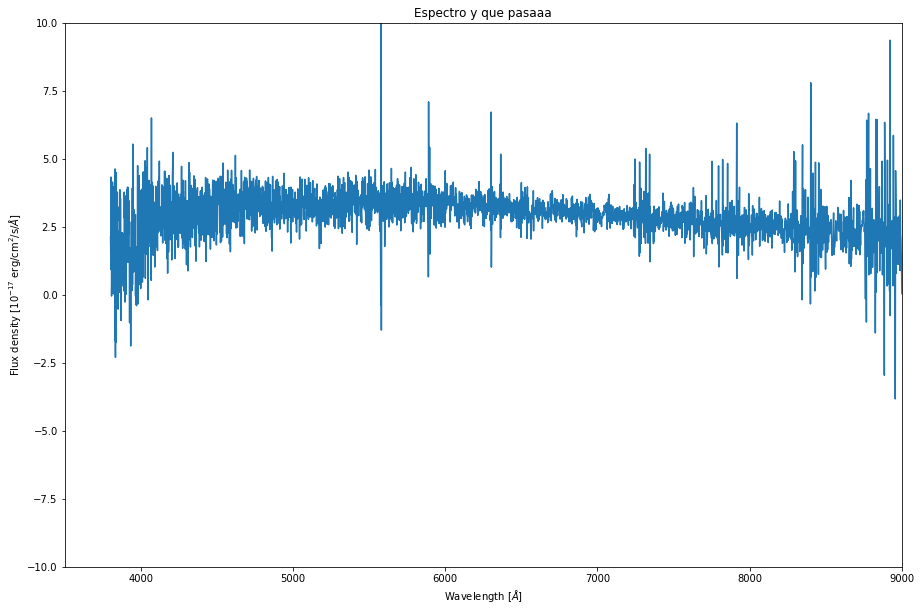

In [13]:
print (WCS(sp[0][0].header))
fits = sp[0]
scidata = fits[1].data
flux = scidata['flux']
lam = scidata['loglam']

plt.figure(figsize = (15,10))
plt.plot(10**(lam), flux)
plt.xlim(3500,9000)
plt.ylim((-10,10))
plt.title("Espectro y que pasaaa")
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux density [10$^{-17}$ erg/cm$^2$/s/$\AA$]')
#NO ENCONTRE EN NINGUN LADO EL ESPECTRO PARA PODER DIBUJAR LAS LINEAS, LO SIENTOOO :(